In [11]:
import numpy     as np
import pandas    as pd
import os
import re
import sys
import json
import time
import base64

import netCDF4
import requests
import warnings 

import xarray as xr
import salem

import geopandas as gpd

In [14]:
al = gpd.read_file("/Users/aurelianosancho/Documents/GitHub/ERA5_download_and_table/Data/BR_UF_2020.shx")

DriverError: Unable to open /Users/aurelianosancho/Documents/GitHub/ERA5_download_and_table/Data/BR_UF_2020.shp or /Users/aurelianosancho/Documents/GitHub/ERA5_download_and_table/Data/BR_UF_2020.SHP.

In [13]:
al.head(3)

,CD_UF,NM_UF,SIGLA_UF,NM_REGIAO,geometry
0,11,Rondônia,RO,Norte,"POLYGON ((-65.38150 -10.42907, -65.38013 -10.4..."
1,12,Acre,AC,Norte,"POLYGON ((-71.07772 -9.82774, -71.07817 -9.828..."
2,13,Amazonas,AM,Norte,"POLYGON ((-69.83766 -3.68659, -69.82555 -3.620..."


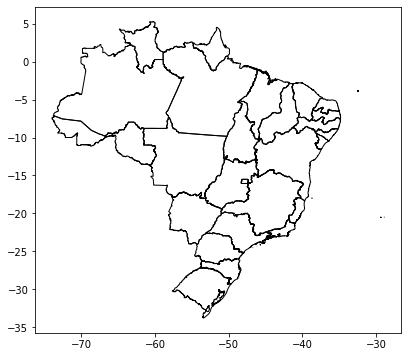

In [5]:
al.plot(figsize=(8,6), edgecolor="black", facecolor="None")

import cdsapi
import xarray as xr
from urllib.request import urlopen

#uploaded = files.upload()
c = cdsapi.Client()

c.retrieve(
    'reanalysis-era5-single-levels',
        {
             'product_type': 'reanalysis',
             'variable': ['2m_temperature', 'total_precipitation'],
        #     'variable': '10m_u_component_of_wind', 
        #    'variable': '10m_v_component_of_wind',
        #    'variable': 'surface_pressure',
        #    'variable': 'total_precipitation',
   
  #          'year': ['1979','1980',],
  #          'year': ['1981','1982','1983','1984','1985',],
  #          'year': ['1986','1987','1988','1989','1990',],          
  #          'year': ['1991','1992','1993','1994','1995',],   
  #          'year': ['1996','1997','1998','1999','2000',],             
  #          'year': ['2001','2002','2003','2004','2005',],           
  #          'year': ['2006','2007','2008','2009','2010',],              
  #          'year': ['2011','2012','2013','2014','2015',],  
             'year': ['2020',],
  #          'year': ['2021',],  
            
            'month': [
                '01', #'02', '03', '04', '05', '06',
                #'07', '08', '09', '10', '11', '12'
            ],
            
            'day': [
                '01', '02', 
                #'03', '04', '05', '06',
                #'07', '08', '09', '10', '11', '12',
                #'13', '14', '15', '16', '17', '18',
               # '19', '20', '21', '22', '23', '24',
               # '25', '26', '27', '28', '29', '30',
               # '31'
            ],
            
            'area': [6, -74, -35, -35,
            ],

            'grid': ['0.25','0.25'],
            
            'time': [
                '00:00', '01:00', '02:00',
                #'03:00', '04:00', '05:00',
                #'06:00', '07:00', '08:00',
                #'09:00', '10:00', '11:00',
                #'12:00', '13:00', '14:00',
                #'15:00', '16:00', '17:00',
                #'18:00', '19:00', '20:00',
                #'21:00', '22:00', '23:00',
            ],
            'format': 'netcdf',
        },
    
    'era5-demo.nc')

In [6]:
    ds = salem.open_xr_dataset('/Users/aurelianosancho/Documents/GitHub/ERA5_download_and_table/Data/temp_era5.nc').isel(time=0)

In [10]:
ds[[1]]

KeyError: 1

In [ ]:
shp = salem.read_shapefile('/Users/aurelianosancho/Documents/GitHub/ERA5_download_and_table/Data/AL_Municipios_2020.shp')

In [ ]:
dsr = ds.salem.roi(shape=shp).sel(latitude=slice(-2, -14), longitude=slice(-40, -30))
dsr

In [ ]:
dsr.to_netcdf('/Users/aurelianosancho/Documents/GitHub/ERA5_download_and_table/Data/subset_brasil.nc')

In [ ]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111)
dsr.t2m.salem.quick_map();
ax.set_title('Temperatura 2m 2020-01-03 15Z', fontsize=12, y=1.02)